# Logistic Regression Sampling Difference

The interpretation of the logistic regression model on the different pseudo-absence generation methods shows that only a few variables of the 175 are particularly important in making the final prediction. The top variable `Albedo_inst_bucket_14` almost amounts to the same predictive effect of the bottom 165 variables. Most of the variables make very little difference to the outcome, so it seems that the pseudo-absence generation method is irrelevant. Similarly, the logistic regression is particularly predictive because it can't overfit to the abundance of unnecessary features.

In [11]:
import pandas as pd
import seaborn as sns
import eli5
import shap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from locusts.data import load_data, preprocess_data
from locusts.models import logistic_regression

sns.set_theme('paper', "whitegrid")
shap.initjs()

In [12]:
# "random" | "ep_random"
def get_data(dataset, bucketize=True, seed=42, n=500):
    data_train, _ = load_data(dataset, path="../data")
    data_x, data_y = preprocess_data(
        data_train, start_day=7, bucketize=bucketize
    )
    
    train_x, val_x, train_y, val_y = train_test_split(
        data_x, data_y, test_size=n, random_state=seed
    )
    return train_x, val_x, train_y, val_y

## Random Sampling

In [13]:
seed = 12
train_x, val_x, train_y, val_y = get_data("random", seed=seed)

Train missing 0 columns
Test missing 0 columns
Objects: ['observation_date']
Categoricals: ['presence', 'year', 'month', 'day']
Floats: ['x', 'y', 'clay_0.5cm_mean', 'clay_5.15cm_mean', 'sand_0.5cm_mean', 'sand_5.15cm_mean', 'silt_0.5cm_mean', 'silt_5.15cm_mean', 'AvgSurfT_inst_0', 'Albedo_inst_0']


In [14]:
lr_model, _, _, scaler = logistic_regression(
    train_x, train_y, val_x, val_y, val_x, val_y, seed=seed, return_scaler=True
)
train_x_scaled = scaler.transform(train_x)
val_x_scaled = scaler.transform(val_x)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [15]:
eli5.explain_weights(lr_model, top=10, feature_names=train_x.columns.tolist())

Explanation(estimator='LogisticRegression(random_state=12)', description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='clay_5.15cm_mean', weight=1.155776011579798, std=None, value=None), FeatureWeight(feature='sand_0.5cm_mean', weight=0.8444363129119252, std=None, value=None), FeatureWeight(feature='Albedo_inst_bucket_9', weight=0.7679935693687071, std=None, value=None)], neg=[FeatureWeight(feature='clay_0.5cm_mean', weight=-1.483092323959721, std=None, value=None), FeatureWeight(feature='Albedo_inst_bucket_14', weight=-1.4374063904787926, std=None, value=None), FeatureWeight(feature='Tair_f_inst_bucket_2', weight=-1.135848870129143, std=None, value=None), FeatureWeight(feature='SoilMoi10_40cm_inst_bucket_14', weight=-0.9397945547807739, std=None, value=None), FeatureWeight(feature='Psurf_f_inst_bucket_10', weight=-0.7894799009666529, std=None, value=None), FeatureWeight(feature='Tair_f_inst_bucket_12', weight=-0.7677208352094055, std=None, value=None), FeatureWeight(feature='Tveg_tavg_bucket_11', weight=-0.758059418784881, std=None, value=None)], pos_remaining=87, neg_remaining=78), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

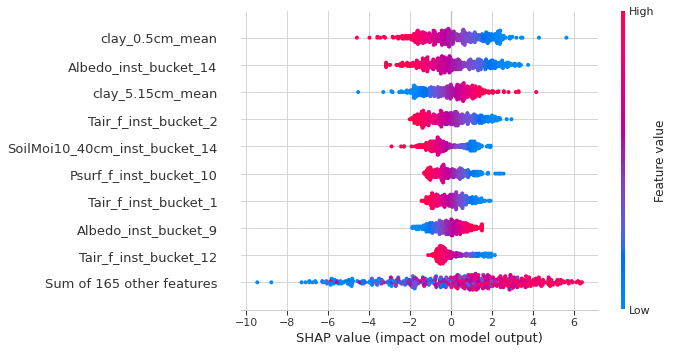

In [18]:
explainer = shap.Explainer(lr_model, train_x_scaled, feature_names=train_x.columns.tolist())
shap_values = explainer(val_x_scaled)
shap.plots.beeswarm(shap_values, show=False)
plt.savefig("shap_random.pdf", bbox_inches='tight')

## Environmental Profiling

In [19]:
train_x, val_x, train_y, val_y = get_data("ep_random", seed=seed)

Train missing 0 columns
Test missing 0 columns
Objects: ['observation_date']
Categoricals: ['presence', 'year', 'month', 'day']
Floats: ['x', 'y', 'clay_0.5cm_mean', 'clay_5.15cm_mean', 'sand_0.5cm_mean', 'sand_5.15cm_mean', 'silt_0.5cm_mean', 'silt_5.15cm_mean', 'AvgSurfT_inst_0', 'Albedo_inst_0']


In [20]:
lr_model, _, _, scaler = logistic_regression(
    train_x, train_y, val_x, val_y, val_x, val_y, seed=seed, return_scaler=True
)
train_x_scaled = scaler.transform(train_x)
val_x_scaled = scaler.transform(val_x)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [21]:
w = eli5.explain_weights(lr_model, top=10, feature_names=train_x.columns.tolist())
w

Explanation(estimator='LogisticRegression(random_state=12)', description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='clay_5.15cm_mean', weight=1.3414644851258826, std=None, value=None), FeatureWeight(feature='sand_0.5cm_mean', weight=1.0105471751546342, std=None, value=None), FeatureWeight(feature='Albedo_inst_bucket_9', weight=0.9537996518077715, std=None, value=None)], neg=[FeatureWeight(feature='Albedo_inst_bucket_14', weight=-1.6624454445442147, std=None, value=None), FeatureWeight(feature='clay_0.5cm_mean', weight=-1.6485290259500238, std=None, value=None), FeatureWeight(feature='Tair_f_inst_bucket_2', weight=-0.993241257969487, std=None, value=None), FeatureWeight(feature='SoilMoi10_40cm_inst_bucket_14', weight=-0.9869383401785368, std=None, value=None), FeatureWeight(feature='Tair_f_inst_bucket_12', weight=-0.8559800752400493, std=None, value=None), FeatureWeight(feature='sand_5.15cm_mean', weight=-0.8518217061151886, std=None, value=None), FeatureWeight(feature='Psurf_f_inst_bucket_10', weight=-0.8493958020434224, std=None, value=None)], pos_remaining=87, neg_remaining=78), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

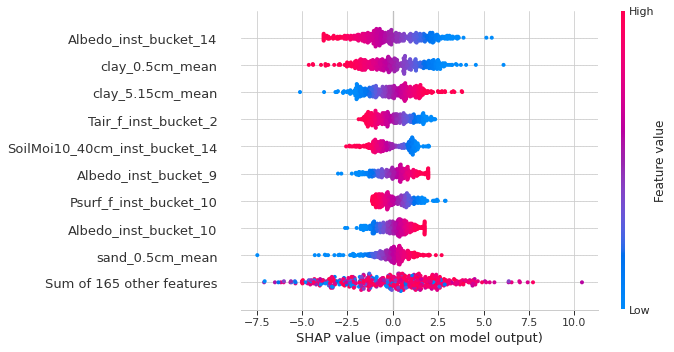

In [23]:
explainer = shap.Explainer(lr_model, train_x_scaled, feature_names=train_x.columns.tolist())
shap_values = explainer(val_x_scaled)
shap.plots.beeswarm(shap_values, show=False)
plt.savefig("shap_env_profiling.pdf", bbox_inches='tight')